<a href="https://colab.research.google.com/github/NagarajaN-Nethi/in/blob/main/Data_Visuaization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this assignment students have to transform iris data into 3 dimensions
and plot a 3d chart with transformed dimensions and colour each data
point with specific class.

In [1]:
import pandas as pd

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [3]:
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [4]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
components = pca.fit_transform(x)

In [6]:
transformed_data = pd.DataFrame(data = components, 
                                columns = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])

In [7]:
finalDf = pd.concat([transformed_data, df[['target']]], axis = 1)

In [8]:
x_vals = finalDf['Principal Component 1']
y_vals = finalDf['Principal Component 2']
z_vals = finalDf['Principal Component 3']

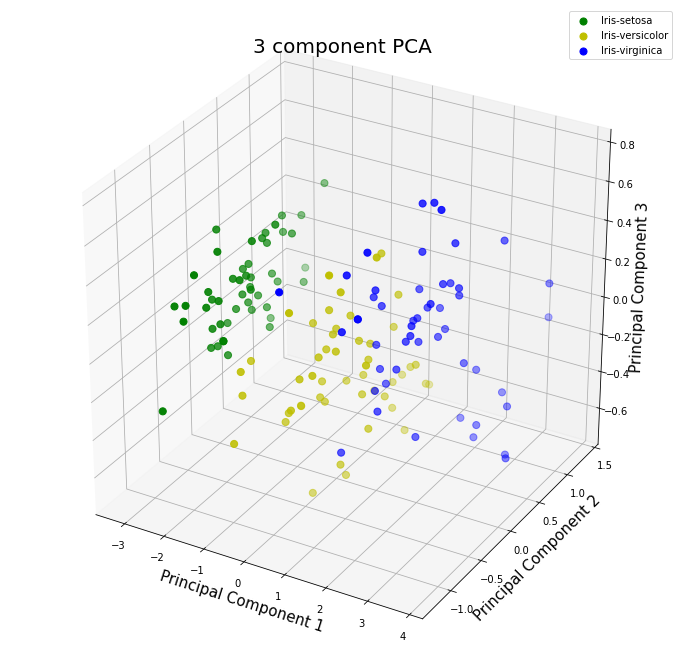

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['g', 'y', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Principal Component 1']
               , finalDf.loc[indicesToKeep, 'Principal Component 2']
               , finalDf.loc[indicesToKeep, 'Principal Component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()